<font size = 10 > Photon-matter interaction </font>


<font size = 5 > Monte Carlo simulation of X-ray imaging <font>

<font size = 3 > In this project, we will be looking at a simulation of medical imaging and X-rays in materials with different attenuation to produce radiographs. Our goal is to make a one dimentional model of a radiograph using Monte Carlo methods. These methods use properties of probabilty to simulate the attenuation of photons through matter and is chosen because the macroscopic picture of attenuation through matter is in reality also stochastic.

At first we will look at the photon propagation and look at necessary conditions for the simulation such as number of photons and step size.
Furthermore, we take practical issues into consideration, and observe whitch energy levels for photons produce the best image with the lowest amount of dosage, whilst still having a large enough intensity to be detected.
At last we use the simulation to image two unknown objects given by 3D arrays of attenuation coefficients and test how different energy levels affects these images. 

We will often refer to equations and figures from the handout[1]. Figures from the handout is referred to as FIG. X, while our own figures will be called Figure X

</font>

-----

## Importing libraries

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import random
from scipy.stats import binom

## Setting global variables

In [2]:
rho_tissue = 1.02 # [g/cm^3]
rho_bone = 1.92 # [g/cm^3]

# Problem 1
#### Attenuation of photons in one dimention
Here we make a one dimentional simulaton of a photon and observe if it passes trough different steps of a known material with length 10cm and an attenuaiton coefficiant of 0.1cm$^{-1}$. 

In [3]:
# Initial values. 
dx_1 = 0.1 # Stepsize. 
width_1 = 10 # Width of matter. 
steps_1 = int(width_1/dx_1) # Total number of steps.
mu_1 = 0.1 # Attenuation constant. 

# Returns True of False depending on whether or not the photons passes the step.
def propagation_Photon(mu, dx):
    rand = np.random.rand() # Generates a random float number between 0 and 1.
    if(rand < dx*mu):       # Eq. [2], probability of photon being absorbed or scattered.  . 
        return False 
    return True             # If the photon passes, returns True
    
# Total photons that passes each depthstep.
def total_Photon(N, steps, mu, dx):
    photons = np.zeros(steps) # An array of zeros.
    total = N
    photons[0] = N
    for i in range(1,steps): # For every step. 
        for k in range(total): # For every photon. 
            if (not propagation_Photon(mu, dx)): # Decreases tot with one for every photon that
                total -= 1 # Does not pass trough. 
        photons[i] = total
    return photons

# Eq. 4 in handout. 
def analytic_curve(x, mu): 
    return np.e**(-mu*x) 

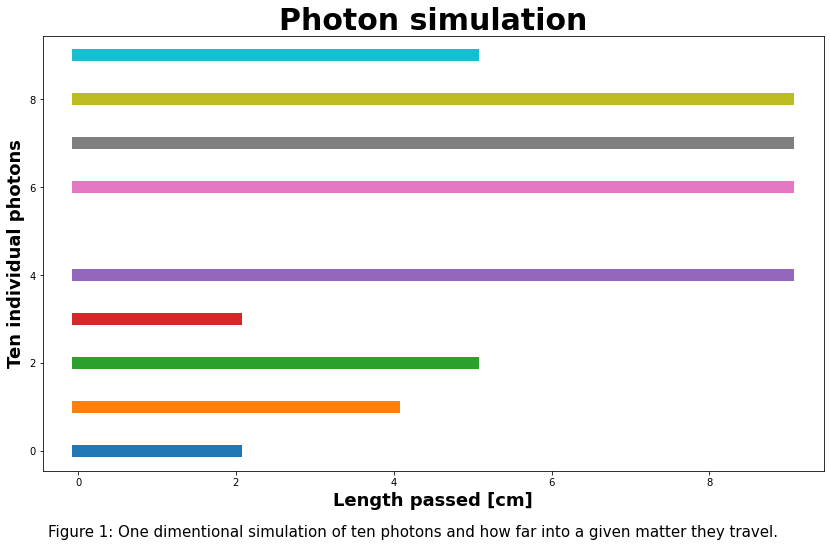

In [4]:
# Plots how many photons are left after every step. 
def plotter_ind_photons():
    pn = np.zeros((10,10))

    for i in range(len(pn[0])):
        totphot = total_Photon(1, 10, 1, 0.1)
        for k in range(10):
            pn[i,k] =  totphot[k] # Tells the list how far the photon got through. 
        for r in range(len(pn)):
            if pn[i][r] == 0:
                pn[i][r:] = None # Removes rest of list if it was scattered or absorbed.

    plt.figure(1, figsize = (14, 8))
    plt.title('Photon simulation', size = 30, fontweight = 'bold')
    plt.ylabel("Ten individual photons", size = 18, fontweight = 'bold')
    plt.xlabel('Length passed [cm]', size = 18, fontweight = 'bold') 
    
    plt.figtext(0.13,0.01, "Figure 1: One dimentional simulation of ten photons and how far into a given matter they travel.", size = 15) 

    # Plots all elements in photonarray.
    for i in range(len(pn)):
        plt.plot(i*pn[i], linewidth = 12)
    plt.show()

plotter_ind_photons()

Not every photon will reach the end of the material. In FIG. 2. we see the relation between the current intensity and inital intensity for a beam of photons. This is equal to the relation between the current and initial number of photons in the beam. We can then expect that the probability of a photon reaching the end to be the same as the the final value with $\mu$ = 0.1 in FIG. 2. This we see is approximately 0.4. Figure 1 illustrates this nicely for a few number of photons.

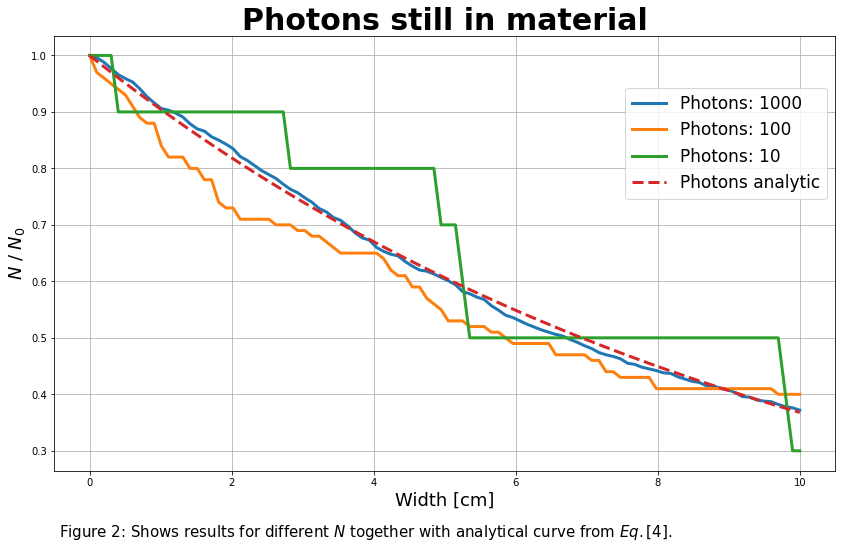

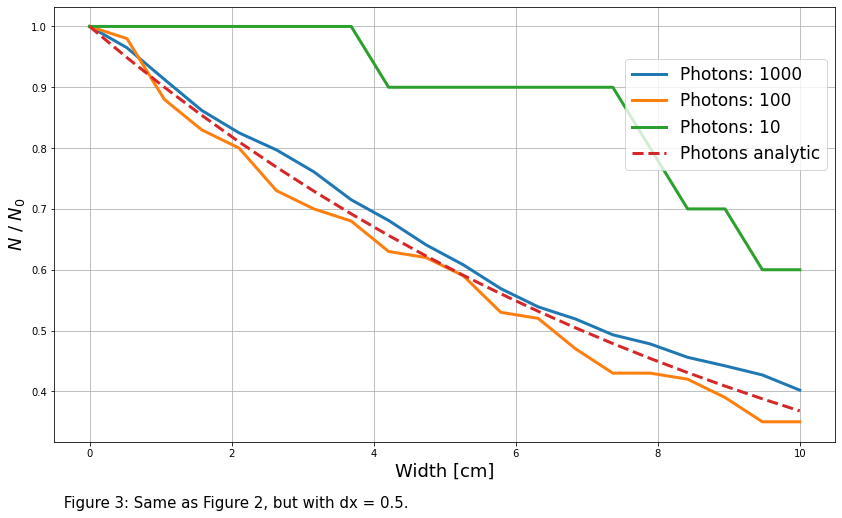

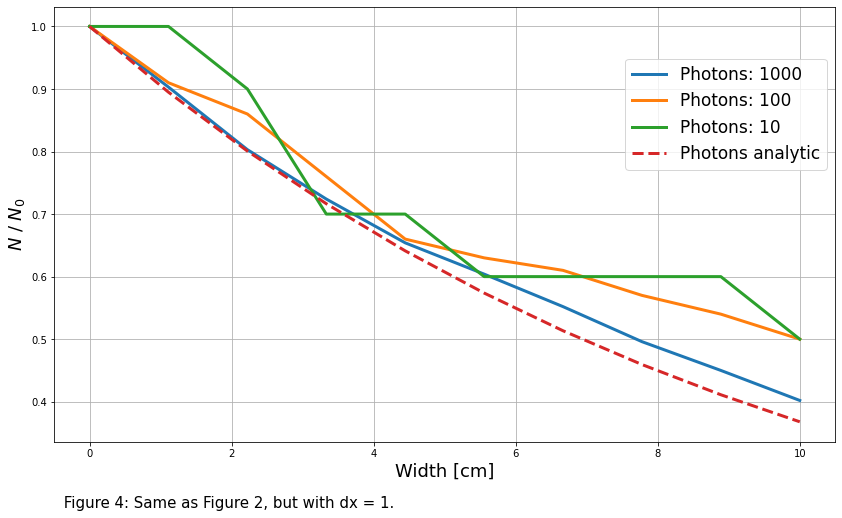

In [32]:
# Function plotting simulation with various number of photons.
def plot_different_N(steps, N_array, dx, figtext):
    width_array = np.linspace(0, width_1, steps) # Array the size of the amount of steps. 
    plt.figure(1, figsize = (14, 8))

    # Plots every simulation in the array given in function. 
    for i in range(len(N_array)):
        plt.plot(width_array,total_Photon(N_array[i], steps , mu_1, dx)/N_array[i], label = f'Photons: {N_array[i]}', linewidth = 3)
    plt.plot(width_array,analytic_curve(width_array, mu_1), '--',label = f'Photons analytic', linewidth = 3) 
    
    plt.legend(prop={"size":17}, loc = "upper right", bbox_to_anchor=(0.5, 0., 0.5, 0.9))
    plt.ylabel("$N$ / $N_0$", size = 18)
    plt.xlabel('Width [cm]', size = 18) 
    
    # Allows for reuse of the same plot function for different variables.
    if figtext == 0:
        plt.figtext(0.13,0.01, "Figure 2: Shows results for different $N$ together with analytical curve from $Eq. [4]$.", size = 15) 
        plt.title('Photons still in material', size = 30, fontweight = 'bold')
    if figtext == 1:
        plt.figtext(0.13, 0.01, " Figure 3: Same as Figure 2, but with dx = 0.5.", size = 15)
    if figtext == 2:
        plt.figtext(0.13, 0.01, " Figure 4: Same as Figure 2, but with dx = 1.", size = 15)
    plt.grid()
    plt.show()

# Below, we run the plot function with different dx.
plot_different_N(steps_1, [1000,100,10], 0.1, 0)
plot_different_N(int(width_1/0.5), [1000,100,10], 0.5, 1)
plot_different_N(int(width_1/1), [1000,100,10], 1, 2)


<font size = 3 >

When choosing stepsize we need to be careful not to get a probability value over 1. the chance to pass trough a certain depthstep cannot be over 1, and the calculations will not be possible. For example if $\mu$ is set to be 100, and we choose a stepsize larger then 0.01, our value of p will be surpassed. We also need to make sure the step size is reasonably small, when this will limit the deviation. This is poorly illustrated in Figure 4 but is true due to the larger number of random samples in Monte Carlo methods.
 

The results from Figure 2-4 were as expected from what we saw in Figure 1. We see from our plot that we get a total probability of about 0.38, which is as we predicted in Problem 1. We see that for higher values of N, the simulation will deviate less and will be approximatly equal to the anatlytical solution for high enough values.

-----

# Problem 2
#### Finding desirable energy levels 

In problem two, we will investigate what energy levels give the highest contrast, the shaprest image and what energy levels makes the object absorb or scatter the least. 
To do this we will be looking at two beams of photons, one going though only tissue and one going through tissue and bone. The beams will all pass through 3 cm of matter and we will study the resulting intensity and difference in contrast between the two beams. 

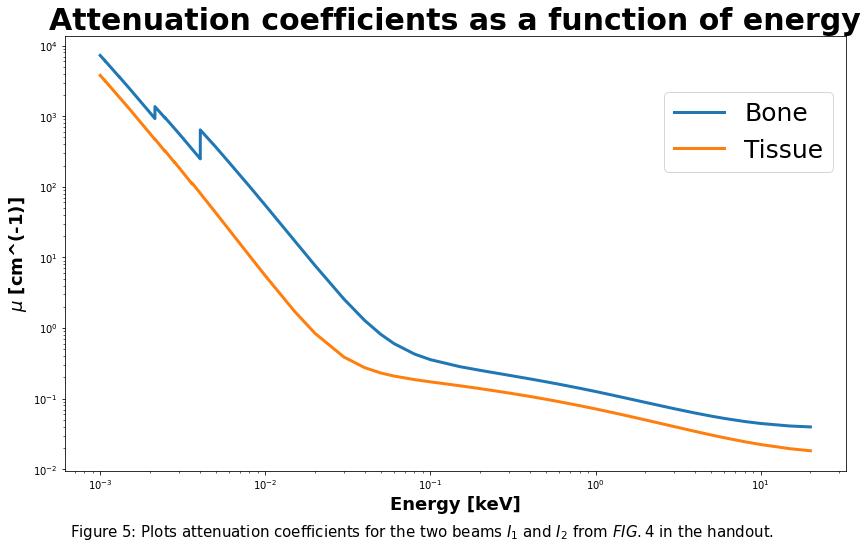

In [6]:
# Function for reading files. 
def getFile(file):
    with open(file) as f:
        liste = []
        for line in f:
            line = line.strip('\n')
            line = line.split(', ')
            line[0] = float(line[0])
            line[1] = float(line[1])
            liste.append(line)
    return np.array(liste) # Returns a 2D array. 

# Takes the two files given and returns four arrays containing,
# energies and mass-attenuation coefficients for tissue and bone
def bone_and_tissue(file1, file2):
    
    # Defines arrays for bone and tissue. 
    bone = getFile(file1)
    tissue = getFile(file2)

    # Creates arrays for keeping energy values and mu divided by rho. 
    bone_E = np.zeros(len(bone))
    bone_mr = np.zeros(len(bone))
    tissue_E = np.zeros(len(bone))
    tissue_mr= np.zeros(len(bone))

    # Fills the arrays above with its designated values from the files.
    for i in range(len(bone)):
        bone_E[i] = bone[i][0]
        bone_mr[i] = bone[i][1]
        tissue_E[i] = tissue[i][0]
        tissue_mr[i] = tissue[i][1]

    return bone_E, bone_mr, tissue_E, tissue_mr

# Plots attenuation as a function of energy.
def plot_Energy_Attenuation(a_bone_E, bone_mr, b_tissue_E, tissue_mr):
    plt.figure(2, figsize = (14, 8))
    
    #multiply the values from the file with the corresponding rho 
    plt.plot(bone_E, bone_mr*rho_bone, label = 'Bone', linewidth = 3) 
    plt.plot(tissue_E,tissue_mr*rho_tissue, label = 'Tissue', linewidth = 3)
    
    plt.legend(prop={"size":25}, loc = "upper right", bbox_to_anchor=(0.5, 0., 0.5, 0.9))
    
    plt.ylabel('$\mu$ [cm^(-1)]', size = 18, fontweight = 'bold')
    plt.xlabel('Energy [keV]', size = 18, fontweight = 'bold')
    plt.title('Attenuation coefficients as a function of energy', size = 30, fontweight = 'bold')
    plt.figtext(0.13,0.01, "Figure 5: Plots attenuation coefficients for the two beams $I_1$ and $I_2$ from $FIG. 4$ in the handout.", size = 15) 
    
    plt.yscale('log')
    plt.xscale('log')
    plt.show()
    
bone_E, bone_mr, tissue_E, tissue_mr = bone_and_tissue('bone.txt', 'tissue.txt')


plot_Energy_Attenuation(bone_E, bone_mr, tissue_E, tissue_mr)

In [38]:
# Simualates one beam and returns an array of number of photons remaining.
# Better code to simulate the passage of N number of photons by using a binomial function instead of a two 
# range functions.
def oneBeam(N,probability_array,dx_array):
    N_a = np.zeros(len(dx_array)) #array to contain number of absorbed photons for each depthstep.
    N_a[0]=int(N)
    for i in range(1,len(dx_array)):
        #Does a binomial calculation to remove absorbed/scattered photons.
        N_a[i]=N_a[i-1]- binom.rvs (int(N_a[i-1]) , probability_array[i-1] ) 
    return N_a


# Creates arrays for the energies and mu for the different matter wanted for the tasks. 
def limited_arrays(bone_E, bone_mr, tissue_E, tissue_mr, min_energy, max_energy):
    
    # Creates empty lists
    lim_E = [] # The energies for tissue and bone within our limits are identical, so there is only need for one energy array
    lim_bone_mr = []
    lim_tissue_mr = []
    for i in range(len(bone_E)):
        
        #Appends every energy value within given limits with its corresponding mass-attenuation coefficients.
        if ((bone_E[i] >= min_energy) and (bone_E[i] <= max_energy)):
            lim_bone_mr.append(bone_mr[i])
            
        if ((tissue_E[i] >= min_energy) and (tissue_E[i] <= max_energy)):
            lim_E.append(tissue_E[i])
            lim_tissue_mr.append(tissue_mr[i])
            
    return np.array(lim_E), np.array(lim_bone_mr), np.array(lim_tissue_mr)


def intensity(N, dx, dx_a, mu_tissue, mu_bone, energy):
    #Creates the probability arrays for tissue and bone.
    p_tissue = np.ones(len(dx_a))*mu_tissue * dx
    p_bone = np.ones(len(dx_a))*mu_tissue * dx
    for i in range(int(len(dx_a)/3),int(len(dx_a)/3*2)): # Adds bone mass-attenuation coefficients to beam 2
        p_bone[i] = mu_bone * dx 
    
    # Gets the arrays of total photons in beam for both beams.
    N_tissue = oneBeam(N,p_tissue,dx_a)
    N_bone = oneBeam(N,p_bone,dx_a)
    
    #Calculates the intensity at the detector by multiplying the remaining number of photons with its energy.
    Intensity_tissue = N_tissue[-1]*energy
    Intensity_bone = N_bone[-1]*energy
    
    return Intensity_tissue,Intensity_bone

#Plots the intensity as a function of energy.
def plot_Energy_Intensity(N, dx, energy, mu_tissue, mu_bone, dx_array):
    
    Intensity_tissue=np.zeros(len(energy))
    Intensity_bone=np.zeros(len(energy))
    Start_intensity=np.zeros(len(energy))
    
    for i in range(len(energy)):
        Intensity_tissue[i],Intensity_bone[i]=intensity(N, dx, dx_array, mu_tissue[i] ,mu_bone[i], energy[i])
        Start_intensity[i] = N*energy[i]

    plt.figure(4, figsize = (14, 8))
    plt.plot(energy*1000,Intensity_tissue/Start_intensity,label = 'Tissue', linewidth = 3 )
    plt.plot(energy*1000,Intensity_bone/Start_intensity, label = 'Bone', linewidth = 3)
    plt.legend(prop={"size":25}, loc = "lower right", bbox_to_anchor=(0.5, 0., 0.5, 0.9))
    plt.title("Intensity as a function of energy ", size = 30, fontweight = 'bold')
    plt.figtext(0.13,0.01, "Figure 6: Shows the intensity of the two beams for energy levels between 10 and 100 keV.", size = 15)
    plt.grid()
    plt.ylabel("$I/I_0$", size = 20)
    plt.xlabel("Energy [$\mathrm{keV}$]", size = 20)
    plt.show()

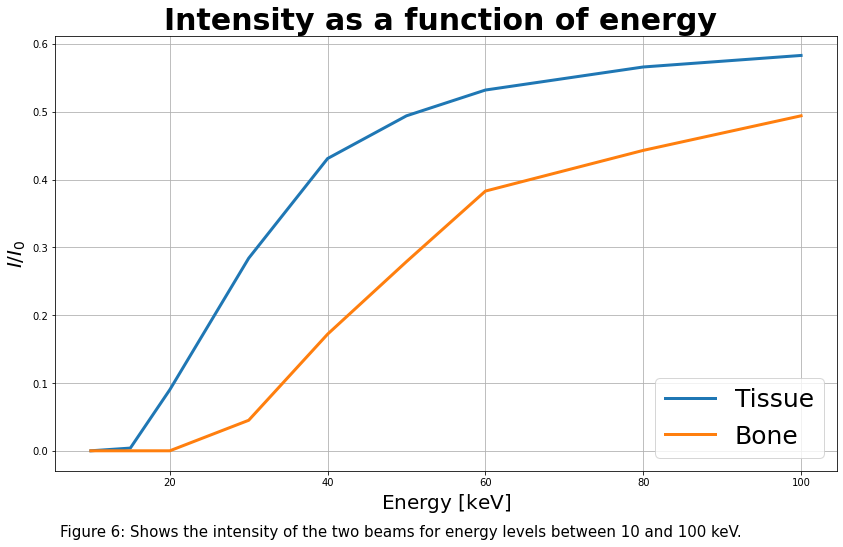

In [39]:
#Defining new variables and constants for problem 2. 
width_2 = 3
steps_2 = 1000
dx_array = np.linspace(0,width_2, steps_2)
dx_2 = dx_array[1]-dx_array[0]
max_lim = 0.1
min_lim = 0.01

lim_E, lim_bone_mr, lim_tissue_mr = limited_arrays(bone_E, bone_mr,tissue_E, tissue_mr ,min_lim, max_lim)
# Multiplies the shortened arrays with the density to get the attenuaion coefficiants.
mu_tissue = lim_tissue_mr*rho_tissue
mu_bone = lim_bone_mr*rho_bone


plot_Energy_Intensity(steps_2, dx_2, lim_E, mu_tissue, mu_bone, dx_array)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


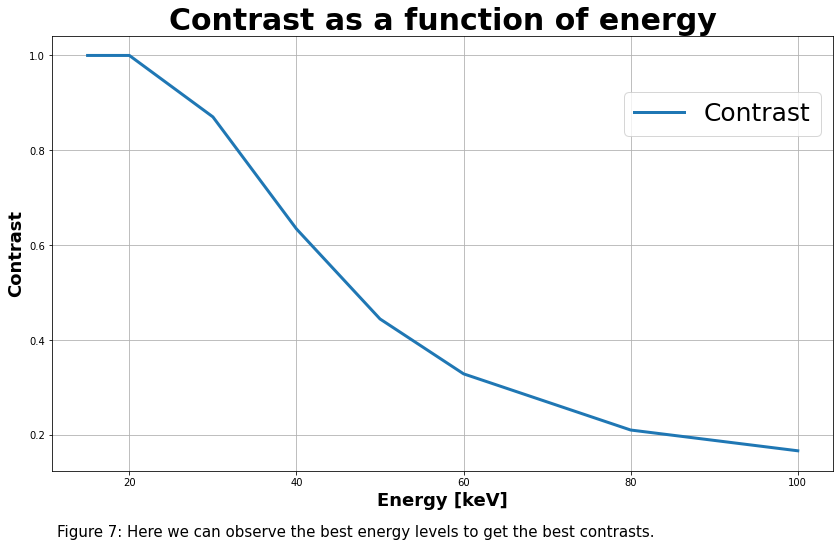

In [37]:
# Plots the contrast as a function of energy
def plot_Contrast(N, dx, energy, mu_tissue, mu_bone, dx_array):
    
    
    Intensity_tissue=np.zeros(len(energy))
    Intensity_bone=np.zeros(len(energy)) #creates the array for the intensity of two beams of photons.
    
    for i in range(len(energy)):
        Intensity_tissue[i],Intensity_bone[i]=intensity(N, dx,dx_array, mu_tissue[i] ,mu_bone[i], energy[i])
    
    # Plots the contrast as a function of energy. 
    plt.figure(69, figsize = (14, 8))
    plt.plot(1000*energy,(Intensity_tissue-Intensity_bone)/Intensity_tissue, label = 'Contrast', linewidth = 3 )
    
    plt.figtext(0.13,0.01, "Figure 7: Here we can observe the best energy levels to get the best contrasts.", size = 15)
    plt.legend(prop={"size":25}, loc = "upper right", bbox_to_anchor=(0.5, 0., 0.5, 0.9))
    plt.title("Contrast as a function of energy", size = 30, fontweight = 'bold')
    plt.ylabel("Contrast", size = 18, fontweight = 'bold')
    plt.xlabel("Energy [keV]", size = 18, fontweight = 'bold')
    plt.grid()
    plt.show()


# Calls the function
plot_Contrast(10**4,dx_2, lim_E, mu_tissue, mu_bone, dx_array)

In [10]:
# Function made to calculate how many photons are required to reach a certain energy level. 
def minimumPhotons(N_0, dx, dx_a ,mu_tissue, mu_bone, energy, maxLim):
    
    # Creates empty arrays.
    minPh = np.zeros(len(lim_E))
    I_bone = np.zeros(len(lim_E))
    I_tissue = np.zeros(len(lim_E))
    
    
    # Enumerates through N and tests if the resulting intensity is 10 MeV. 
    for i in range(len(minPh)):
        if i > 0:
            N_0 = minPh[i-1]
        Intensity = intensity(N_0, dx, dx_a, mu_tissue[i], mu_bone[i],  energy[i])
        
        while(Intensity[0] < 10) and (N_0 < maxLim):
            N_0 += 10
            
            # Increases the number added to N to decrease runtime.
            if (N_0 > 1000) and (N_0 < 10000):
                N_0 += 100
            if (N_0 > 10**4) and (N_0 < 10**5):
                N_0 += 1000
            if (N_0 > 10**5) and (N_0 < 10**6):
                N_0 += 10000
            if (N_0 > 10**6):
                N_0 += 100*10**6
            #tests the function again with new N
            Intensity = intensity(N_0, dx, dx_a, mu_tissue[i], mu_bone[i], energy[i])
          
        I_tissue[i] = Intensity[0]
        I_bone[i] = Intensity[1]
        minPh[i] = N_0

    return minPh[::-1], I_tissue[::-1], I_bone[::-1]

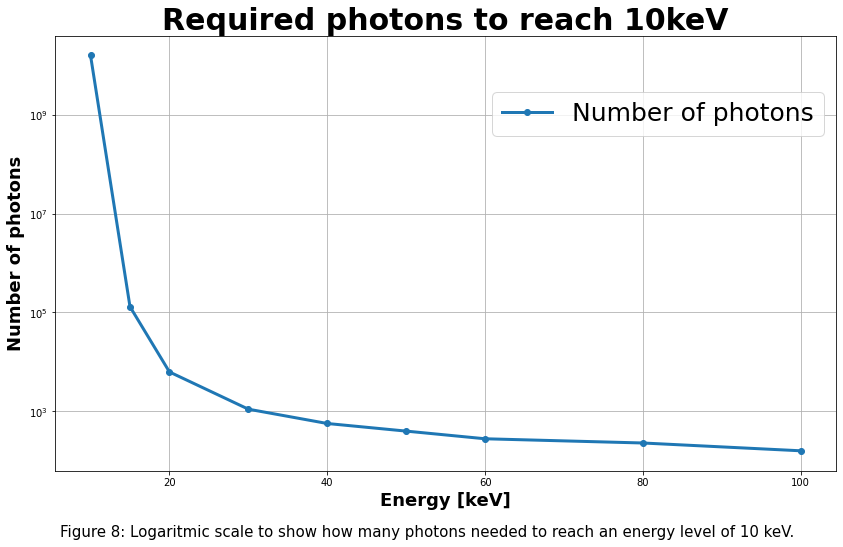

In [36]:
#Calls the functions. 
minPh, I_t, I_b = minimumPhotons(0, dx_2, dx_array ,mu_tissue[::-1], mu_bone[::-1], lim_E[::-1], 10**13)

#Plots the required number of photons to achieve 10 MeV in the detector. 
def plot_required_photons(lim_E, minPh):
    plt.figure(69, figsize = (14, 8))
    plt.plot(lim_E*1000, minPh, '-o', linewidth = 3, label = "Number of photons")
    plt.yscale('log')

    plt.figtext(0.13,0.01, "Figure 8: Logaritmic scale to show how many photons needed to reach an energy level of 10 keV.", size = 15)
    plt.legend(prop={"size":25}, loc = "upper right", bbox_to_anchor=(0.5, 0., 0.5, 0.9))
    plt.title("Required photons to reach 10keV", size = 30, fontweight = 'bold')
    plt.ylabel("Number of photons", size = 18, fontweight = 'bold')
    plt.xlabel("Energy [keV]", size = 18, fontweight = 'bold')
    plt.grid()
    plt.show()

plot_required_photons(lim_E, minPh)

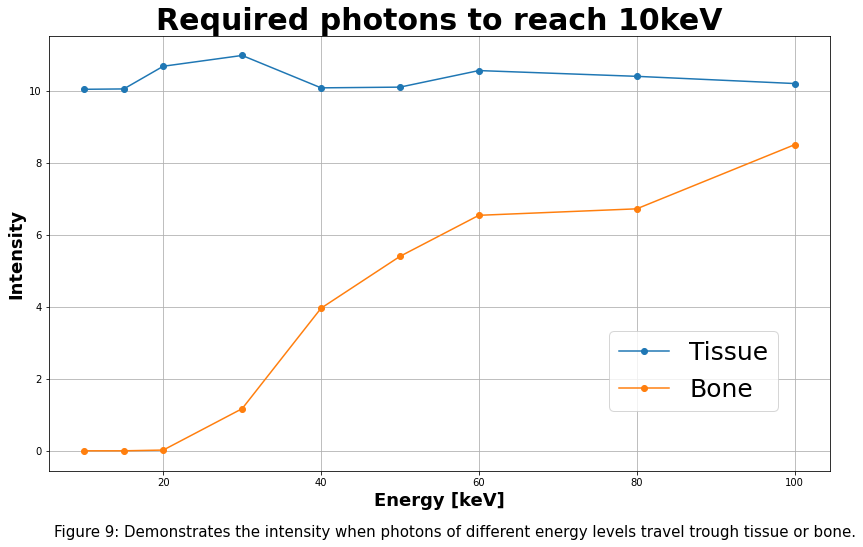

In [40]:
#Plots the intensity recived at the detector for the beam through tissue and bone with the required number of 
#photons. 
def plot_intensities_with_min_photon(lim_E, I_t, I_b):
    plt.figure(3, figsize = (14, 8))
    plt.plot(lim_E*1000, I_t, '-o',label = 'Tissue')
    plt.plot(lim_E*1000, I_b, '-o',label = 'Bone')
    plt.figtext(0.13,0.01, "Figure 9: Demonstrates the intensity when photons of different energy levels travel trough tissue or bone.", size = 15)
    plt.legend(prop={"size":25}, loc = "upper right", bbox_to_anchor=(0.45, -0.55, 0.5, 0.9))
    plt.title("Required photons to reach 10keV", size = 30, fontweight = 'bold')
    plt.ylabel("Intensity", size = 18, fontweight = 'bold')
    plt.xlabel("Energy [keV]", size = 18, fontweight = 'bold')
    plt.grid()
    plt.show()
plot_intensities_with_min_photon(lim_E, I_t, I_b)

<font size = 3>

In Figure 8 we see that for high energy values the number of photons required to reach an intensity of 10 MeV is relatively low starting at a value around 170 photons and reaching about 1000 photons at 0.03 MeV. For energy values lower then this, the number of photons increase drasticly. 
<font>

In [47]:
# Returns total dosage from beam 1 and 2
def dose(N, dx,dx_a, mu_tissue, mu_bone, energy, width):
    
    total_dose = np.zeros(len(energy))

    # Creates the probability arrays.
    for i in range(len(energy)):
        
        p_tissue = np.ones(len(dx_a))*mu_tissue[i] * dx
        p_bone = np.ones(len(dx_a))*mu_tissue[i] * dx
        #Takes into account that beam 2 goes through bone 
        for k in range(int(len(dx_a)/3),int(len(dx_a)/3*2)):
            p_bone[k] = mu_bone[i] * dx
        
        #Calculates number of the attenuated photons
        N_tissue = oneBeam(N[i],p_tissue,dx_a)
        N_bone = oneBeam(N[i],p_bone,dx_a)
        N_att_tissue = N_tissue[-1]-N_tissue[0]

        #Adds beam 1's dose to the total dose
        total_dose[i] += N_att_tissue*energy[i]/(width*rho_tissue)
        
        #Calculates beam 2's dose and adds to the total dose
        Dose_bone = 0
        for j in range(len(N_bone)):
            if (j<int(len(dx_a)/3) or int(len(dx_a)/3*2<j)):
                Dose_bone += (N_bone[j-1]-N_bone[j])*energy[i]/((dx_a[j]-dx_a[j-1])*rho_tissue)
            else:
                Dose_bone += (N_bone[j-1]-N_bone[j])*energy[i]/((dx_a[j]-dx_a[j-1])*rho_bone)
        
        #Adds total dosage to its element in the array
        total_dose[i] += Dose_bone
        
    return total_dose

#Creates the contrast array from Eq. 6 in handout.
def Contrast(N, dx, dx_array, mu_tissue, mu_bone, energy):
    

    Intensity_tissue=np.zeros(len(energy))
    Intensity_bone=np.zeros(len(energy))
    
    #Creates intensity arrays
    for i in range(len(energy)):
        Intensity_tissue[i],Intensity_bone[i]=intensity(N, dx, dx_array, mu_tissue[i] ,mu_bone[i], energy[i])  
    #Calculates contrast
    contrast = (Intensity_tissue-Intensity_bone)/Intensity_tissue
    
    return contrast


#plots the contrast and dose, as well as the relation between them
def plot_contrast_and_dose(contrast, total_dose):
    
    fig, (fig1,fig2) = plt.subplots(1,2, figsize = (15,6))  

    color = 'black'
    fig1.set_xlabel('Energy [KeV]')
    fig1.set_ylabel('Dose (KeV/m)', color=color)
    fig1.plot(lim_E*1000, total_dose, color=color)
    fig1.tick_params(axis='y', labelcolor=color)
    fig1.set_yscale('log')
    fig1.title.set_text("Dose and concentration as a function of energy")

    ax2 = fig1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'blue'
    ax2.set_ylabel('Contrast', color=color)  # we already handled the x-label with ax1
    ax2.plot(lim_E[1:]*1000, contrast[1:] , color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    color = 'black'
    fig2.set_xlabel('Energy [KeV]')
    fig2.set_ylabel('Dose [KeV/m]', color=color, )
    fig2.plot(lim_E*1000, contrast/total_dose, color=color)
    fig2.tick_params(axis='y', labelcolor=color)
    fig2.title.set_text('C/D')

    fig.tight_layout()# otherwise the right y-label is slightly clipped
    plt.figtext(0.05,-0.05, "Figure 10: Illustrates the connection between dose, contrast and energy.", size = 15)

    plt.show() 

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in true_divide


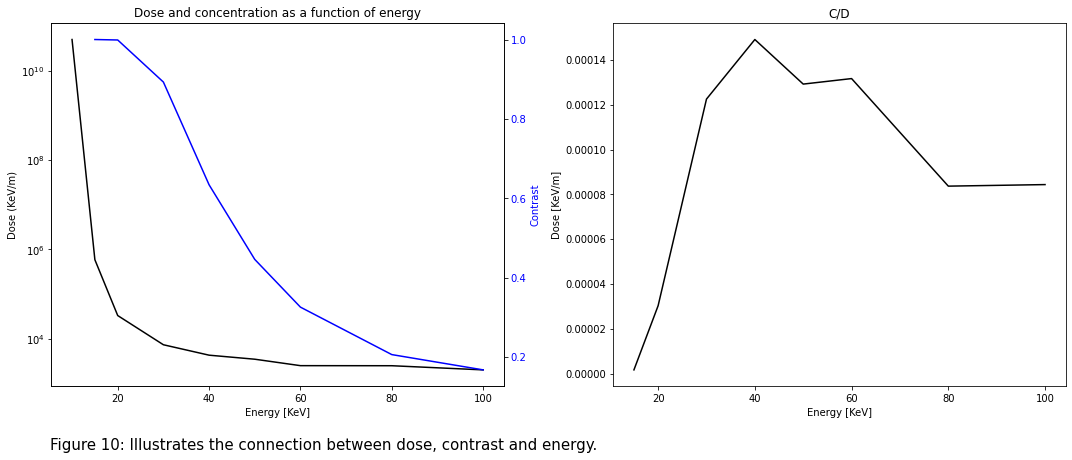

In [48]:
contrast = Contrast(10000, dx_2, dx_array, mu_tissue, mu_bone, lim_E)

total_dose = dose(minPh, dx_2, dx_array, mu_tissue, mu_bone, lim_E, width_2)

plot_contrast_and_dose(contrast, total_dose)

<font size = 3>


From Figure 7, we can see that the best constrasts are given from the lower energy levels. According to our graph, levels at about 15 keV and 20 keV give the best contrast. For 10keV we get division by zero due to the high rate of propagation.


Additionally, lower energy levels are assosiated with lower health risks and are therefore preferable. 


We see that the number of photons required to reach an intensity of 10 MeV increases dramaticly as we approach an energy of 0.01 MeV per photon. We approximated the number of photons at 0.01 MeV to be somewhat around 20 billions to reach an intensity of 10 MeV. We therefore choose to remove this value as we can clearly see that it would lead to an enourmous amount of energy being absorbed.


To obtain a good contrast we see from Figure 7 that we prefer energy values to be small. But to keep the dosage low and minimize energy absorption. We clearly see from Figure 10 that we want a high energy value. <font>

# Problem 3
#### Plotting of an image in three perpendicular directions

To obtain readable images from our X-ray simulation, we will now define functions that are able to read three dimentional arrays and plot images with different energies. These images are to be presented from x, y and z direction.  

In [28]:
# The given test array. 
array = np.load("test_array.npy") 

# Shows the image in x, y and z direction.
def showImage(N, array, energy,tittel,figtext,t_z,t_y,t_x ):
    
    # Needs this to not go out of bounds. 
    # array = array/100 
    
    # Calculations for imaging in the x-direction. 
    x_direction = np.zeros((len(array[:,0,0]),len(array[0,0,:])))
    dx_a = np.linspace(0,t_x,len(array[0,:,0]))
    dx = dx_a[1]-dx_a[0]
    
    for j in range(len(x_direction[:,0])):
        for i in range(len(x_direction[0,:])):
            Na =oneBeam(N,array[j,:,i]*dx,dx_a)
            if Na[-1]*energy>10:
                x_direction[j,i]=Na[-1]*energy/10
    

    # Calculation for imaging in the z direction. 
    z_direction = np.zeros((len(array[0,:,0]),len(array[0,0,:])))
    dz_a = np.linspace(0,t_z,len(array[:,0,0]))
    dz = dz_a[1]-dz_a[0]
 
    for j in range(len(z_direction[:,0])):
        for i in range(len(z_direction[0,:])):
            Na =oneBeam(N,array[:,j,i]*dz,dz_a)
            if Na[-1]*energy>10:
                z_direction[j,i] = Na[-1]*energy/10

    # Calculations for imaging in the y direction.
    y_direction = np.zeros((len(array[:,0,0]),len(array[0,:,0])))
    dy_a = np.linspace(0,t_y,len(array[0,0,:]))
    dy = dy_a[1]-dy_a[0]
    for j in range(len(y_direction[:,0])):
        for i in range(len(y_direction[0,:])):
            Na =oneBeam(N,array[j,i,:]*dy,dy_a)
            if Na[-1]*energy>10:

                y_direction[j,i]=Na[-1]*energy
            
    # Creates subplots. 
    fig, (fig1,fig2,fig3) = plt.subplots(1,3,figsize = (15,6)) 
    
    # Plots in x, y and z direction.
    plt.figure(1)
    fig1.imshow(z_direction)
    fig1.set(xlabel= "x-direction", ylabel = "y-direction ")
    
    plt.figure(1)
    fig2.imshow(x_direction) #cmap = "bone")
    fig2.set(xlabel= "y-direction", ylabel = "z-direction ")
   
    plt.figure(1)
    fig3.imshow(y_direction) # cmap = "bone")
    fig3.set(xlabel= "x-direction", ylabel = "z-direction ")
    
    if figtext == 1:
        fig.text(0.13,0.01, "Figure 11: X-ray images of object 1 with varying energies from x, y and z direction.", size = 15)
    
    if figtext == 2:
        fig.text(0.13,0.01, "Figure 12: X-ray images of object 2, also with differen energies and angles.", size = 15)
    fig.suptitle(tittel)
    
    plt.show()

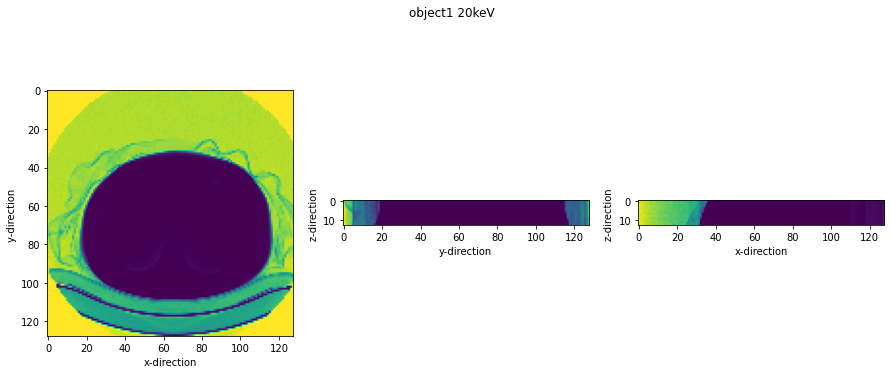

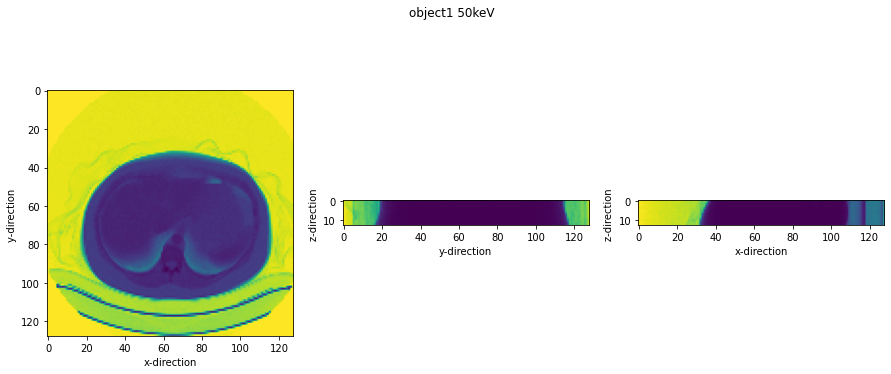

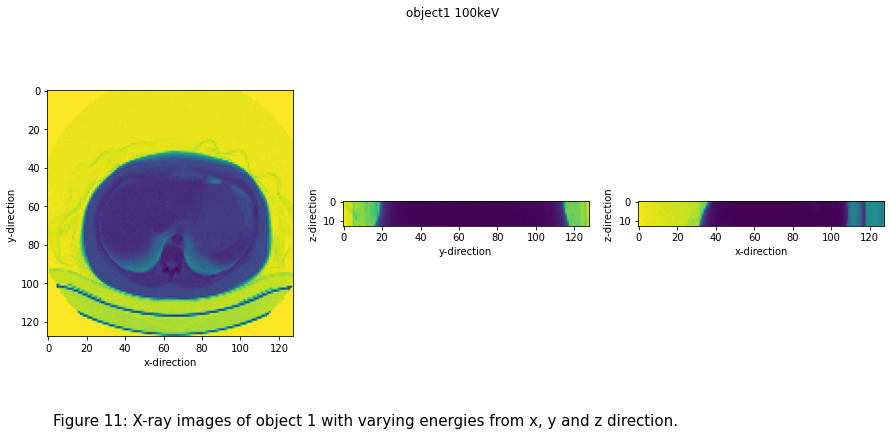

In [35]:
# Plots object 1 with different energy levels.
t_z = 6.5 # [cm] # Since mu is given in [cm^-1] the distance must be the same. 
t_x = 44.6 # [cm]
t_y = 44.6 # [cm]
object1_20 = np.load("object1_20keV.npy")
showImage(10000,object1_20,20*10**(3),"object1 20keV", 0,t_z,t_y,t_x)

object1_50 = np.load("object1_50keV.npy")
showImage(5000,object1_50,50*10**(3), "object1 50keV", 0,t_z,t_y,t_x)

object1_100 = np.load("object1_100keV.npy")
showImage(5000,object1_100,100*10**(3), "object1 100keV", 1,t_z,t_y,t_x)

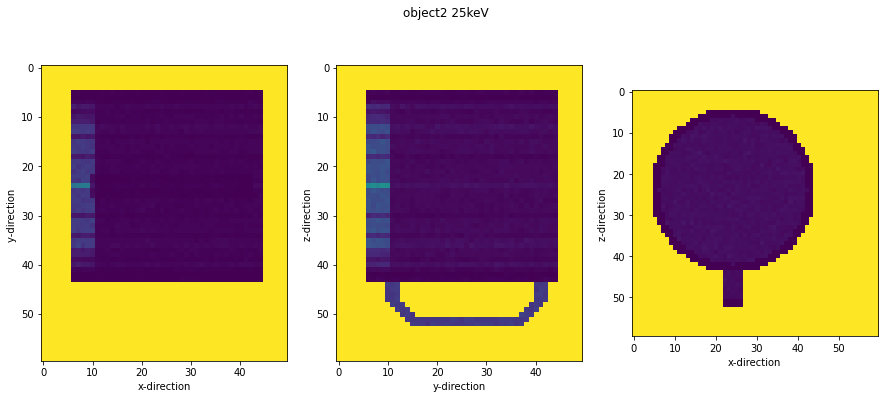

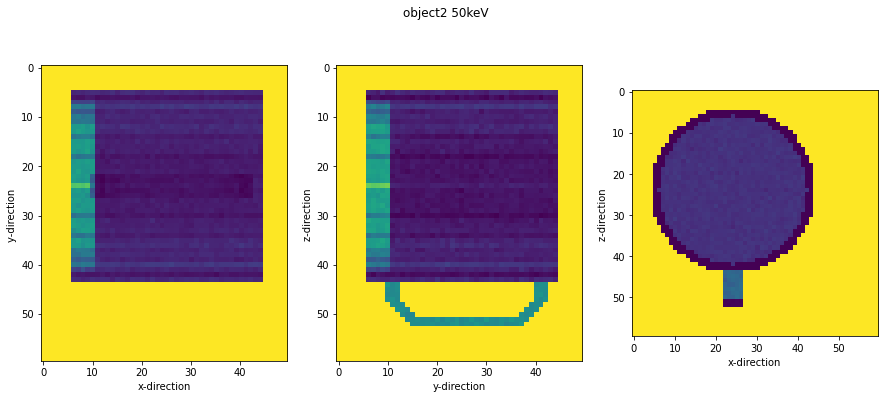

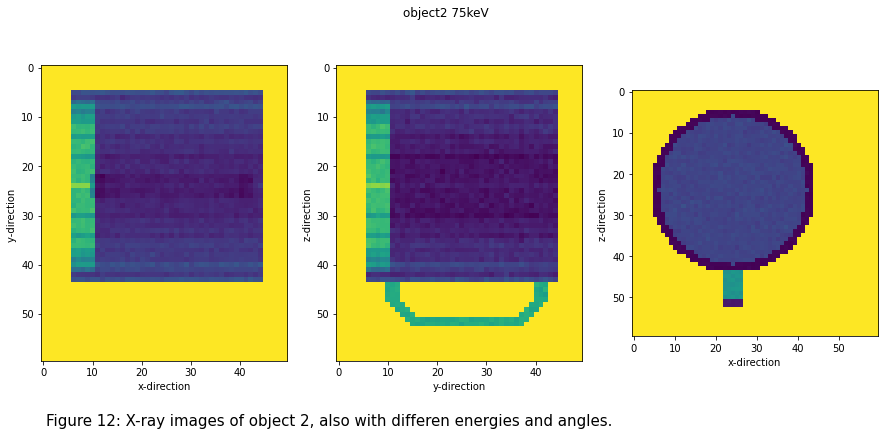

In [34]:
# Plots object 2 with different energy levels.
object2_25 = np.load("object2_25keV.npy")
t_x_2 = 10 # [cm]
t_y_2 = 12 # [cm]
t_z_2 = 12 # [cm]
showImage(1000,object2_25,25*10**(3), "object2 25keV", 0,t_z_2,t_y_2,t_x_2)

object2_50 = np.load("object2_50keV.npy")
showImage(1000,object2_50,50*10**(3), "object2 50keV", 0,t_z_2,t_y_2,t_x_2)

object2_75 = np.load("object2_75keV.npy")
showImage(1000,object2_75,75*10**(3), "object2 75keV", 2,t_z_2,t_y_2,t_x_2)


<font size = 3>

The three plots for the different energy levels show notable difference. The most notable is the difference in contrast which was expected. For the energy 20KeV in object 1 the contrast is too large and it blacks out the image, making it hard to seperate structures inside the object. For higher energy the image becomes more clear and we can work out different parts of the objects. 


For both 50 KeV and 100 KeV we see the object but the surroundings are more prominent in 50KeV in contrast to 100 KeV. Therefore if we were to choose one energylevel to image object 1 with we would go with 50KeV because of its ability to contrast the inside of the object aswell as the outside quite well. For object 2, we still see the same evolution from 25KeV to 75KeV but this time there is no surroundings to image and if we were to choose one energy level we might go with 75 KeV

It is also interesting to mention that what we would want to image of object one would determine what energy level to use. If the object of interest is the surrounding area around the lungs the lowest energy of 20KeV would be the natural choice. 

Object 1 is an X-ray of a human chest, and object 2 is a mug filled with something, coffee perhaps. 


<font>

# Conclusion

<font size = 3>
We have in this project simulated a one-dimentional photon propagation using Monte Carlo methods. Using the given data of mass-attenuation coeffisient and corresponding energy values, we have evaluated some problems assosiated with X-ray such as health risks due to energy absorbtion and the minimun intensity for detecting photon beams. 

In Problem 1 we simulated the propagation of photons though matter and tested the Monte Carlo method to see how different step sizes and different number of photons would impact our estimated result against the expected result. We saw that a low enough step size and a high sample size of photons was sufficient to estimate the expected result. The step size must be low enough to ensure that the product between the attenuation coefficient and the step size is lower than 1.

In Problem 2 we found out that with energies between 0.01 MeV and 0.1 MeV, our results indicate that the contrast bewtween bone and tissue is best at low energies, and decreases as energy increases. The dosage on the other hand increases as the energy decreases and approaches 0.01 MeV. We therefore get that the most efficient use of energy with regards to contrast per dosage is 0.04 MeV as seen in Figure 10.

In Problem 3 we used our simulation to image two three dimentional arrays. The images illustrated are a set of human lungs and a mug. Taking contrast and what object we are imaging to account we would choose the value 50 KeV for the lungs and 75 KeV for the mug.

We have through this project seen how X-rays and how the attenuation of photons through different matter will impact and determine how we can image different objects. What we would want to image would impact what energy level we might want to use. In addition, the dose of radiation absorbed in organic material would also affect our decicions due to the health risk that is associated with X-ray imaging. 



<font>

-----

# References



<font size="3">
    
[1] Project 2: Henning Goa, Hugdal. (Handout)




</font>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=29391064-d611-47dd-bd32-3cf2111b8f40' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>